In [91]:
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
def load(name):
    df = pd.read_csv(name)
    df.datetime = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S.%f')
    df.set_index(['datetime'],inplace=True)
    df = df.resample("W")
    return df

filenames = ["US-CAL-CISO", "US-MIDA-PJM", "US-MIDW-MISO", "US-TEX-ERCO"]

In [97]:
dfs = []
for filename in filenames:
    df = load(f"../electricity_map/{filename}.csv")
    dfs.append(df)

In [98]:
columns = [
    "carbon_intensity_avg",
    "carbon_intensity_direct_avg",
    "carbon_intensity_production_avg",
    "carbon_intensity_discharge_avg",
    "carbon_intensity_import_avg",
    "total_production_avg",
    "total_storage_avg",
    "total_discharge_avg",
    "total_import_avg",
    "total_export_avg",
    "total_consumption_avg",
]



def plot(df_i):
    fig = plt.figure(figsize=(18,14))
    for i, c in enumerate(columns):
        ax = plt.subplot(4,4,i+1)
        dfs[df_i][c].mean().plot(ax=ax, label=c)
        ax.set_xticklabels([])
        ax.legend(loc="upper left")

    
    fig.suptitle(filenames[df_i])
    plt.show()

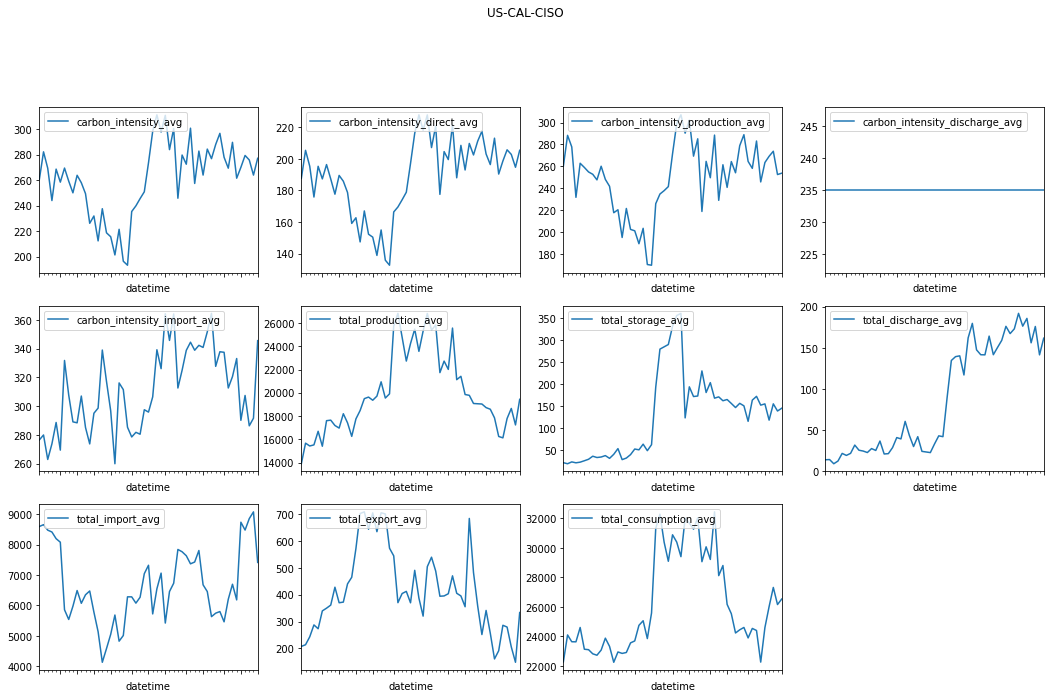

In [99]:
plot(0)

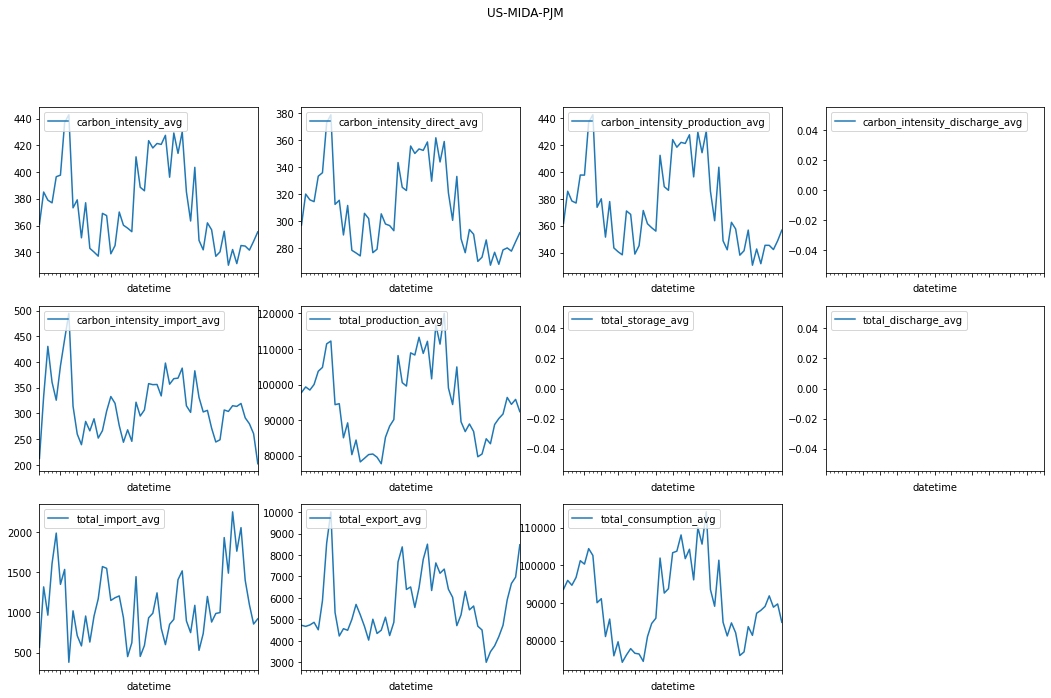

In [100]:
plot(1)

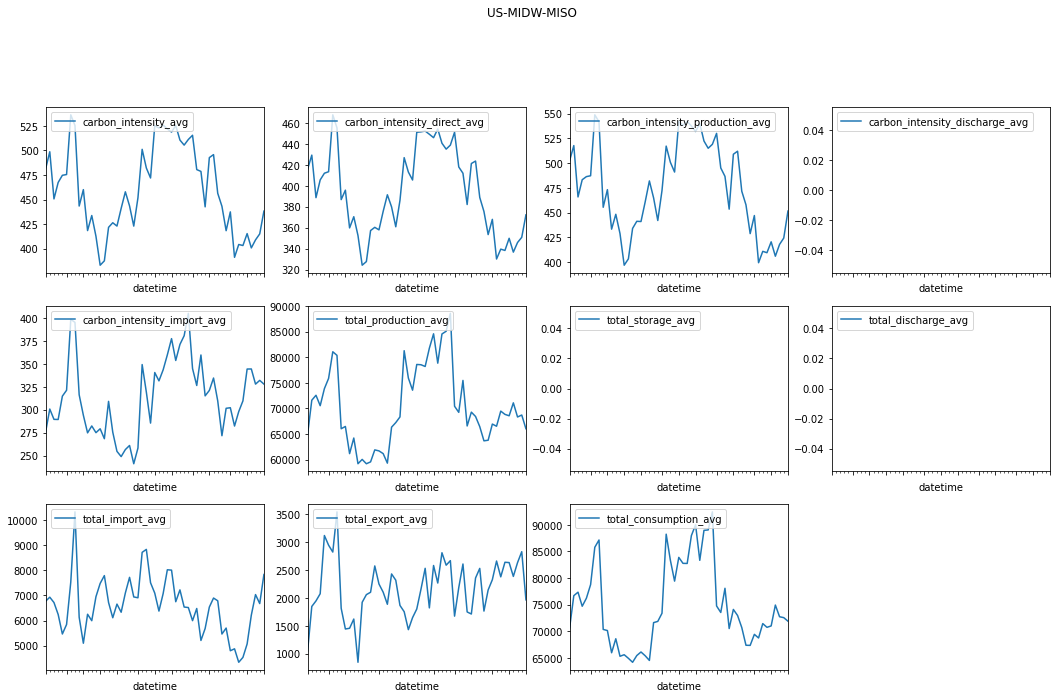

In [101]:
plot(2)

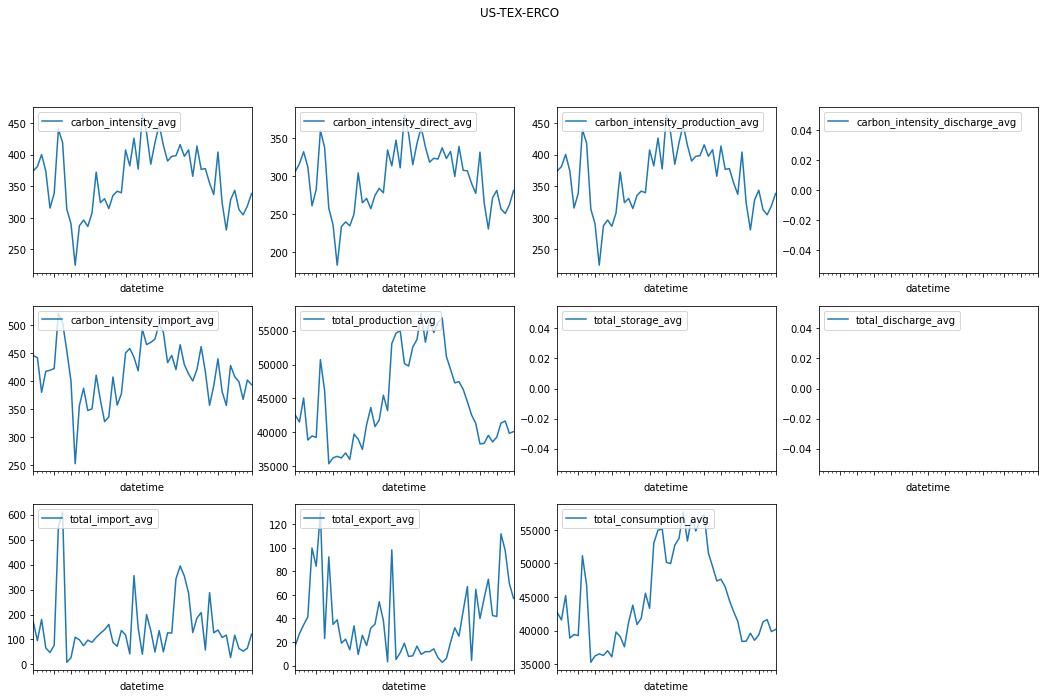

In [102]:
plot(3)